## Udemy_【世界で5万人が受講】実践 Python データサイエンス
### Lec56-59 titanic号の分析

### 調べたサイト
#### 列の削除について https://note.nkmk.me/python-pandas-drop/
#### データ型のエラーについて　https://teratail.com/questions/122946

In [7]:
import pandas as pd
from pandas import Series, DataFrame

titanic_df = pd.read_csv('./all/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.info() # データの概要

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### このデータから有用な知見を得るために、明確な目標があったほうが良いでしょう。いくつか、具体的な問いを設定してみます。
#### 1.) タイタニック号の乗客はどのような人達だったのか？
#### 2.) それぞれの乗客はどのデッキにいたか？また、それは客室の種類とどのような関係にあったか？
#### 3.) 乗客は主にどこから来たのか？
#### 4.) 家族連れか、単身者か？

### これらの基本的な問いの後に、さらに深くデータ解析を進めます。
#### 5.) 沈没からの生還者には、どのような要因があったのか？

まず最初の質問： タイタニック号の乗客はどのような人達だったのか？

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

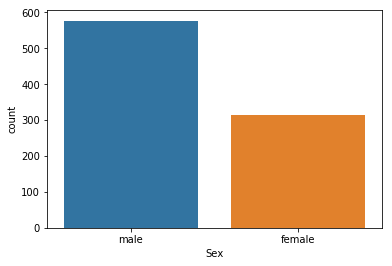

In [9]:
sns.countplot("Sex",data=titanic_df)# まずは性別からチェック

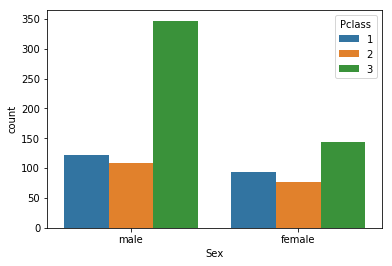

In [10]:
sns.countplot('Sex',data=titanic_df,hue='Pclass')# 乗客の性別を客室で層別化してみましょう。

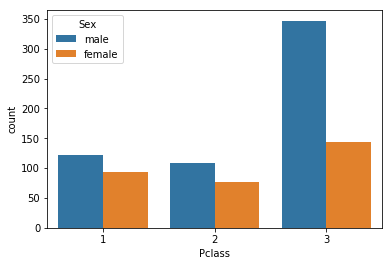

In [11]:
sns.countplot('Pclass',data=titanic_df,hue='Sex')# 今度は、乗客の客室を性別で層別化してみましょう。

3等客室は女性に比べて、男性が圧倒的に多い事がわかります。 子供という概念を導入して、さらに客層を詳しく調べてみましょう。

In [13]:
# 16歳未満を子供とします。
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
#personという新しい列を追加する
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [14]:
# 最初の10行を確認してみましょう。
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


これで、男性、女性、子供という列が出来ました。これは後で、「女性と子供を先に！」という考えが実践されていたかどうかを確認するのに使います。

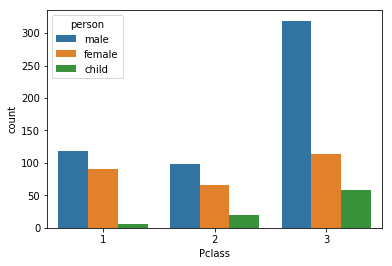

In [15]:
sns.countplot('Pclass',data=titanic_df,hue='person')# 再び、客室の種類別で人数を数えます。

3等客室には沢山の子供がいたのに、1等客室にはほとんど居ません。年齢に関する分布をも少し詳しく見てみましょう。

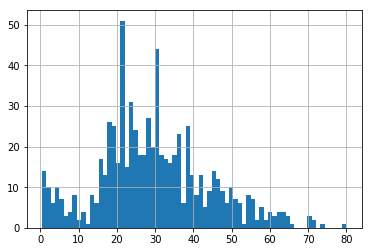

In [18]:
titanic_df['Age'].hist(bins=70)# pandasで簡単にヒストグラムを描く方法です。

In [22]:
titanic_df['Age'].mean()

29.69911764705882

In [23]:
titanic_df['person'].value_counts()# 数の小計を出すことも可能です。

male      537
female    271
child      83
Name: person, dtype: int64

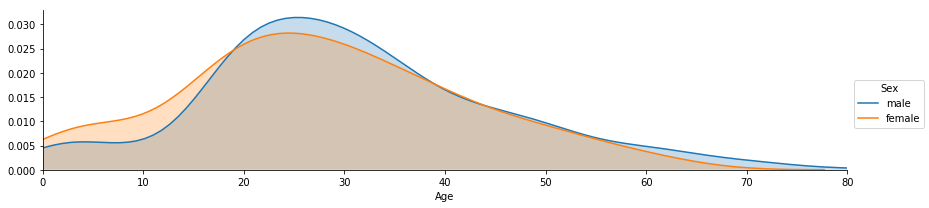

In [31]:
# FacetGridを使うと、複数のカーネル密度推定のグラフを1つのプロットに描くことができます。

fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)# 性別で層別化して、グラフを少し横長に設定します。
fig.map(sns.kdeplot,'Age',shade= True)# mapを使って、性別ごとにkdeplotを描くようにします。

oldest = titanic_df['Age'].max()# xの最大値を長老に合わせます。
fig.set(xlim=(0,oldest))# x軸の範囲を設定します。

fig.add_legend()# 凡例を付け加えておきましょう。

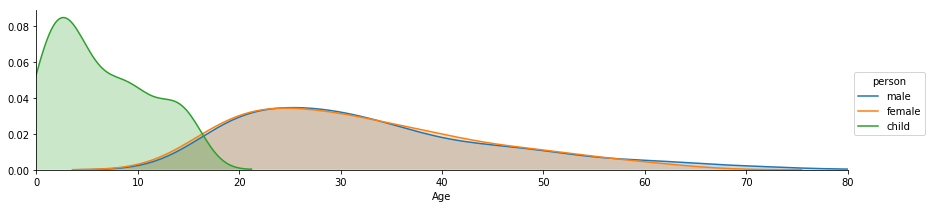

In [33]:
# person列について同じ事をやれば、子供も含めたKDE plotが描けます。
fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

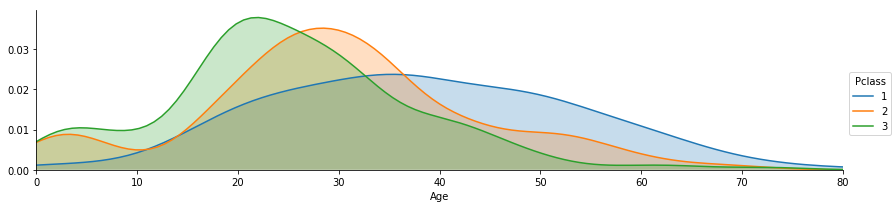

In [34]:
# こんどは、客室別に同じことをやってみましょう。
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

性別、年齢、客室の種類など、乗客の全体像がよくわかって来たと思います。 次の質問に移りましょう。 それぞれの乗客はどのデッキにいたか？また、それは客室の種類とどのような関係にあったか？

In [35]:
titanic_df.head()# 再び、データの概要です。

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Cabinという列が、それぞれの乗客が居た場所ですが、NaN値があるので、まずはこれを除去します。

In [36]:
deck = titanic_df['Cabin'].dropna()# NaNを消して、deckという新しいオブジェクトを作ります。

In [37]:
deck.head()# Quick preview of the decks

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

実は、最初の1文字だけあれば、どこにいたのか分かります。

     0
0    C
1    C
2    E
3    G
4    C
5    D
6    A
7    C
8    B
9    D
10   B
11   C
12   B
13   C
14   F
15   F
16   C
17   E
18   A
19   D
20   D
21   C
22   B
23   E
24   D
25   F
26   D
27   C
28   B
29   F
..  ..
174  E
175  B
176  B
177  D
178  E
179  F
180  B
181  B
182  D
183  B
184  D
185  B
186  A
187  E
188  B
189  B
190  E
191  B
192  E
193  C
194  C
195  D
196  E
197  D
198  A
199  D
200  B
201  C
202  B
203  C

[204 rows x 1 columns]
    Cabin
0       C
1       C
2       E
3       G
4       C
5       D
6       A
7       C
8       B
9       D
10      B
11      C
12      B
13      C
14      F
15      F
16      C
17      E
18      A
19      D
20      D
21      C
22      B
23      E
24      D
25      F
26      D
27      C
28      B
29      F
..    ...
174     E
175     B
176     B
177     D
178     E
179     F
180     B
181     B
182     D
183     B
184     D
185     B
186     A
187     E
188     B
189     B
190     E
191     B
192     E
193     C
194     C
195     D
19

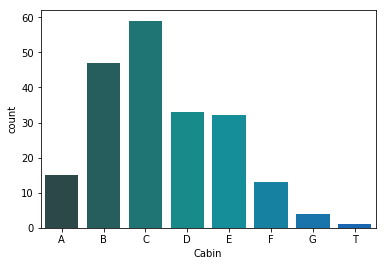

In [38]:
# シンプルに、for文で取り出してみましょう。
levels = []

# 1文字目を取り出します。
for level in deck:
    levels.append(level[0])

# DataFrameを作って、プロットします。
cabin_df = DataFrame(levels) #indexにカラム名が無い
print (cabin_df)
cabin_df.columns = ['Cabin'] #カラム名の追加
print (cabin_df)

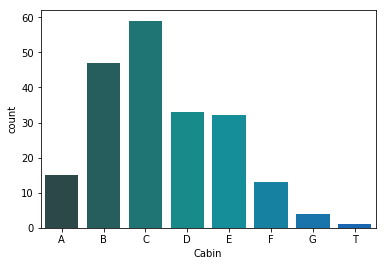

In [39]:
sns.countplot('Cabin',data=cabin_df,palette='winter_d',order=sorted(set(levels)))

Tだけ離れているので、恐らく、間違ったデータです。

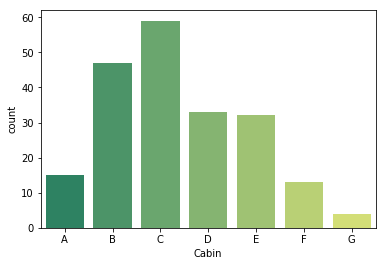

In [40]:
# T以外のデータだけから新しくDataFrameを作ります。
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot('Cabin',data=cabin_df,palette='summer',order=sorted(set(cabin_df['Cabin'])))

グラフの色合いは、お好きなように変更できます。以下のリンクからお気に入りを探してみてください。 また、それぞれのpalette名には、「_d」を付けると、少し暗い色味になります。
リンク: http://matplotlib.org/users/colormaps.html

### 乗客が居た場所ごとの解析ができました。引き続き、3つ目の質問に応えていきましょう。
#### 3.) 乗客は主に、どこから来たのか？

In [41]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


乗船した場所を示す「Embarked」列には、C,Q,S という値が入っています。 Kaggleのページを参照すると、それぞれCherbourg, Queenstown, Southhamptonだということがわかります。

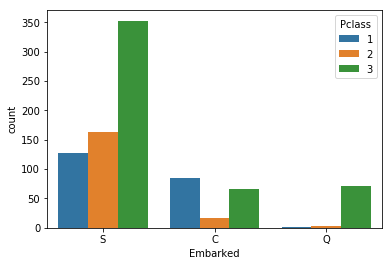

In [42]:
sns.countplot('Embarked',data=titanic_df,hue='Pclass')# orderで順番を指定できます。

In [45]:
# 実はNaNがあります。
from collections import Counter
Counter(titanic_df.Embarked)

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

In [46]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Queenstownからの乗客のほとんどが、3等客室です。これは、当時のこの地域の経済が余り良くなかった事を反映しているのかも知れません。

### それでは、4つめの質問です。
#### 4.) 家族連れか？単身者か？

In [48]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [49]:
# 単身者かどうかを示す新しい列を追加しましょう。

# 親子、兄弟姉妹を示す列を足し合わせます。
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

Alone列が0でなければ、その乗客は誰かと一緒に乗船したことが分かります。 1人（Alone）と家族と（With Family）に分けてみましょう。

In [58]:
# 数字を、文字列に変換します。
#titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
#titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'
titanic_df['Alone'] = titanic_df['Alone'].apply(lambda x: 'With Family' if x >0 else 'Alone')
# 警告がでることがありますが、無視して構いません。詳しくは、以下を参照してみてください。
url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

TypeError: '>' not supported between instances of 'str' and 'int'

上のエラーはAlone作成時に最初にx>0で"With Family"に置き換わってて次にx==0を読む時に"With family"を数値として読もうとしてエラーなってた

In [61]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [62]:
#Alone列を一回削除してそれから始めてみるか
titanic_df = titanic_df.drop("Alone",axis=1)

In [63]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [64]:
#再チャレンジ
titanic_df['Alone'] = titanic_df['Alone'].apply(lambda x: 'With Family' if x >0 else 'Alone')

KeyError: 'Alone'

と思ったら、まずAloneの列を作らないといけない

In [65]:
#上でやったことをもう一度
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [66]:
#再再チャレンジ
titanic_df['Alone'] = titanic_df['Alone'].apply(lambda x: 'With Family' if x >0 else 'Alone')

In [67]:
titanic_df.head() ##成功！！！

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


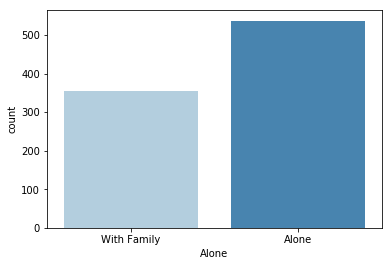

In [68]:
sns.countplot('Alone',data=titanic_df,palette='Blues')# とりあえず描画してみます。

それでは最後に最も興味深い問いである、どのよな要因が生死を分けたのかを見ていくことにしましょう。

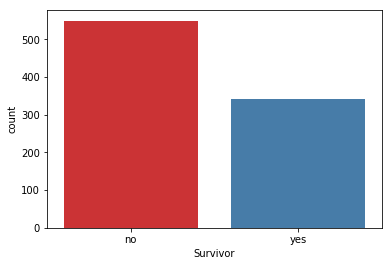

In [69]:
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})# 「Survivor」という新しい列を作ります。
sns.countplot('Survivor',data=titanic_df,palette='Set1')

かなり多くの人々が犠牲になっているのがわかります。客室の種類は関係あるのでしょうか？映画Titanicで言われているように、3等客室の乗客への扱いが不当に悪かったかどうかを見てみます。

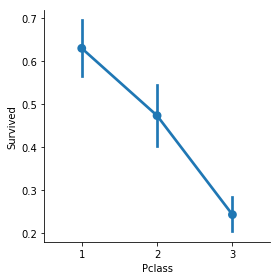

In [70]:
sns.factorplot('Pclass','Survived',data=titanic_df, order=[1,2,3])# こういった解析には、factorplotが便利です。

3等客室の乗客の生存率はかなり低いことが分かります。ただし、これは3等客室に男性が多い、つまり、「女性と子供を先に」というポリシーの犠牲になったのかもしれません。これを調べるために、もう少し詳しく見ていきましょう。

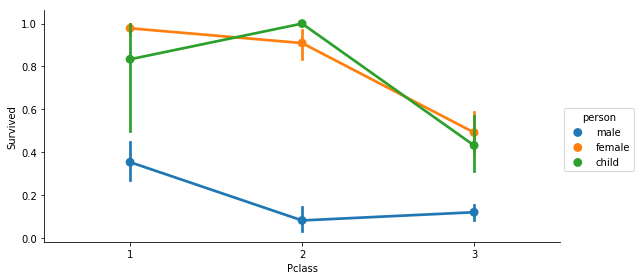

In [71]:
#どこがどう繋がってるか理解できてない.グラフの作り方
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df, order=[1,2,3], aspect=2)# 性別を考慮して、factorplotを描きます。

In [72]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


3等客室の乗客の生存率は、やはり悪いことが分かります。また、男性であるということは、生存率を著しく下げることも見て取れます。2等客室の乗客に関しては、「女性と子供を先に」というポリシーが実践されていたようです。

それでは、年齢はどうでしょうか？

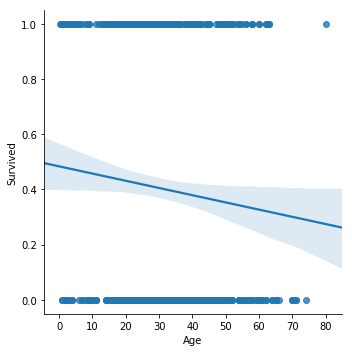

In [73]:
sns.lmplot("Age","Survived",data=titanic_df)# 年齢と生存率のグラフを描いてみましょう。

年齢が上がるに連れて生存率が下がっているのが分かります。ここに、客室の情報を加えてみましょう。

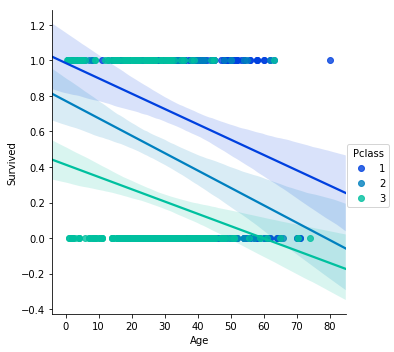

In [74]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter', hue_order=[1,2,3])# 客室の種類で層別化します。

x_binsを使うと、少し見やすくできます。

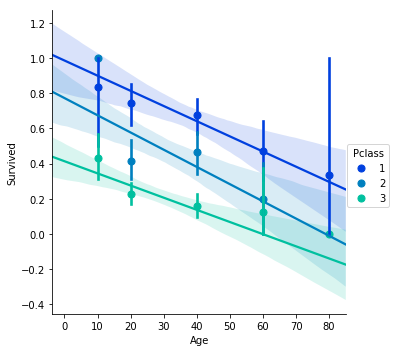

In [75]:
generations=[10,20,40,60,80]# ポイントを決めて、標準偏差を追記できます。
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations,hue_order=[1,2,3])

1等客室に、歳をとった偉い人が居た可能性があります。 性別と年齢の関係も見てみましょう。

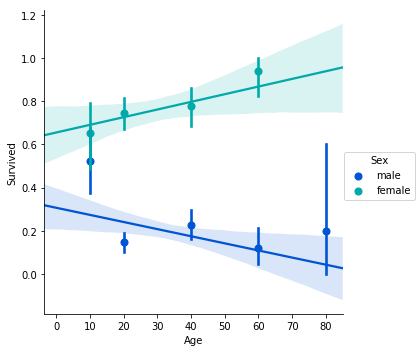

In [76]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

性別、年齢、客室の等級が、生存率にどう影響するのかデータを可視化することができました。
慣れてきたと思うので、以下の問いにも挑戦してみましょう。

1.) 乗客が居たデッキは生存率と関係あるか？また、その答えは感覚的な答えと合うだろうか？

2.) 家族連れであることは、事故からの生還率を上げているだろうか？


## とりあえず書いてることの写経はできた
### 自分で考えて新しくグラフを作るはまず紙になにやるかかけるようになってからやろう
#### 基本的にここでやったのを、数値変えてできればいいだけだな.あと一回写経したらできるかな

## 今日は1時間半